## Ejemplo Decision Tree MNIST
<div style="border-style:groove;border-width:thin;padding:10px">
MNIST es un dataset de 70000 dígitos numéricos escritos a mano por empleados del censo y por estudiantes de instituto de EEUU. Para poder trabajar con él, las imágenes están digitalizadas y reducidas a 28x28 pixels en blanco y negro. El objetivo de esta actividad es entrenar un modelo de clasificación que consiga determinar de que número se trata en función de los 784 datos de entrada (28x28). Cada pixel se trata como una entrada al sistema. La salida será el número del 0 al 9 que identifica. 
    </div>

<div style="border-style:groove;border-width:thin;padding:10px">
A continuación vamos a importar el dataset y a generar los conjuntos X e y.
    </div>

In [2]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version=1)
mnist.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [3]:
X, y = mnist["data"], mnist["target"]
print(X.shape)
print(y.shape)

(70000, 784)
(70000,)


<div style="border-style:groove;border-width:thin;padding:10px">
Ahora vamos a coger una muestra cualquiera y a pintarlo. Los datos están como un array de una dimensión y 784 valores. Hay que cambiarlos a un array de dos dimensiones de 28x28 para poder pintarlo como una imagen. 
    </div>

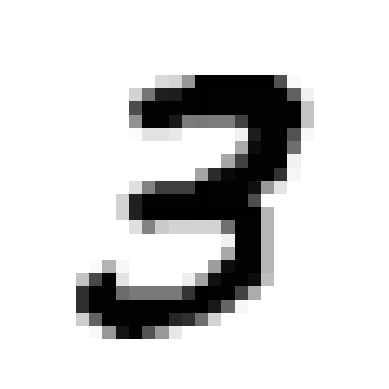

3


In [4]:
import matplotlib as mpl
import matplotlib.pyplot as plt


some_digit = X.iloc[[7]].values
some_digit_image = some_digit.reshape(28, 28)
plt.imshow(some_digit_image, cmap="binary")
plt.axis("off")
plt.show()

print(y[7])

<div style="border-style:groove;border-width:thin;padding:10px">
Es tu turno! Trata de resolver el problema con un árbol de decisión siguiendo los pasos que se indican a continuación:
    </div>

<div style="border-style:groove;border-width:thin;padding:10px">
1. Divide el dataset en el conjunto de entrenamiento y de test.
    </div>

In [5]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)


<div style="border-style:groove;border-width:thin;padding:10px">
2. Crea un árbol de decisión con los parámetros que quieras e intenta mostrar el gráfico del árbol.
    </div>

In [6]:
from sklearn.tree import DecisionTreeClassifier
treeclf = DecisionTreeClassifier(max_depth=10, random_state=42)
treeclf.fit(X_train, y_train)


DecisionTreeClassifier(max_depth=10, random_state=42)

In [7]:
from sklearn.tree import export_graphviz

export_graphviz(
    treeclf,
    out_file="mnist_tree.dot",
    feature_names=mnist.feature_names,   # sin [2:]
    class_names=[str(i) for i in range(10)],
    filled=True,
    rounded=True
)

# En Linux (si tienes graphviz instalado):
!dot -Tpng mnist_tree.dot -o mnist_tree.png


dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.117814 to fit


<div style="border-style:groove;border-width:thin;padding:10px">
3. Genera la predicción (y_pred) con el árbol entrenado y mira la precisión que has conseguido. Módifica los hiperparámetros del árbol en el código del punto 2 para mejorar los resultados.
    </div>

In [8]:
y_pred = treeclf.predict(X_test)
print(y_pred)

['8' '4' '6' ... '5' '9' '2']


In [9]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.8557714285714285

<div style="border-style:groove;border-width:thin;padding:10px">
4. Recorre la muestra de test viendo los datos que son erróneos y muestra la imagen. Evalúa si el resultado es suficientemente bueno.
</div>

Errores: 2524 de 17500


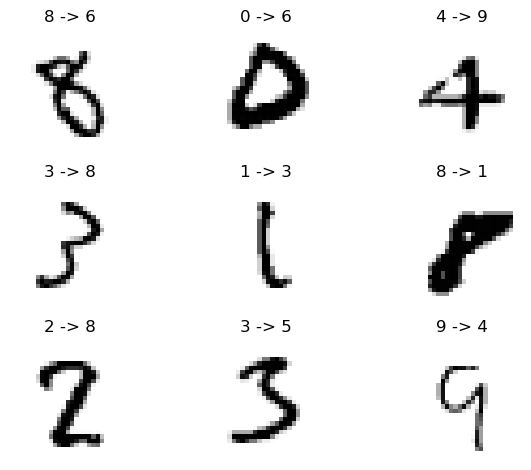

In [10]:
import numpy as np
import matplotlib.pyplot as plt

y_pred = treeclf.predict(X_test)
errores = np.flatnonzero(y_pred != y_test)

print(f"Errores: {len(errores)} de {len(y_test)}")

n = min(9, len(errores))
for i in range(n):
    idx = errores[i]
    plt.subplot(3, 3, i + 1)
    plt.imshow(X_test.iloc[idx].values.reshape(28, 28), cmap="binary")
    plt.title(f"{y_test.iloc[idx]} -> {y_pred[idx]}")
    plt.axis("off")

plt.tight_layout()
plt.show()


<div style="border-style:groove;border-width:thin;padding:10px">
5. Prueba ahora a resolver el problema con SVM. 
    </div>

In [12]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

svm_clf = make_pipeline(
    StandardScaler(),
    SVC(kernel="rbf", C=5, gamma="scale", random_state=42)   # puedes ajustar C
)

svm_clf.fit(X_train, y_train)
ypred_svm = svm_clf.predict(X_test)

print("Precisión:", accuracy_score(y_test, ypred_svm))


Precisión: 0.9695428571428572
